<a href="https://colab.research.google.com/github/springboardmentor789r/AgriYield/blob/Intern_DevikaTati/TimeSeriesforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ----------------Model 1: ARIMA------------------------------
arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=12)
mae, rmse = evaluate_forecast(test['Value'], arima_pred)
results['ARIMA']=[mae,rmse]

In [ ]:
# ------------------------------- Model 2: Exponential Smoothing -------------------------------
exp_model = ExponentialSmoothing(train['Value'], trend='add', seasonal=None)
exp_fit = exp_model.fit()
exp_pred = exp_fit.forecast(12)
mae, rmse = evaluate_forecast(test['Value'], exp_pred)
results['Exponential Smoothing']=[mae,rmse]

In [ ]:
pip uninstall prophet fbprophet-y

Found existing installation: prophet 1.1.7
Uninstalling prophet-1.1.7:
  Would remove:
    /usr/local/lib/python3.12/dist-packages/prophet-1.1.7.dist-info/*
    /usr/local/lib/python3.12/dist-packages/prophet.libs/libtbb-ff323302.so.2
    /usr/local/lib/python3.12/dist-packages/prophet.libs/libtbbmalloc-4dcb68e3.so.2
    /usr/local/lib/python3.12/dist-packages/prophet/*
Proceed (Y/n)? y
  Successfully uninstalled prophet-1.1.7


In [ ]:
pip install prophet --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.5 MB/s eta 0:00:00


In [ ]:
pip install prophet cmdstanpy

In [ ]:
# -------------------------------Model 3: Prophet -------------------------------
prophet_df = train.reset_index().rename(columns={'Date': 'ds', 'Value': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)
prophet_pred = forecast.iloc[-12:]['yhat'].values
mae, rmse = evaluate_forecast(test['Value'], prophet_pred)
results['Prophet']=[mae,rmse]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Step 5: Compare Models
results_df = pd.DataFrame(results, index=['MAE', 'RMSE']).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                            MAE      RMSE
ARIMA                  0.599608  0.634884
Exponential Smoothing  1.393042  1.588121
Prophet                1.543909  1.776410


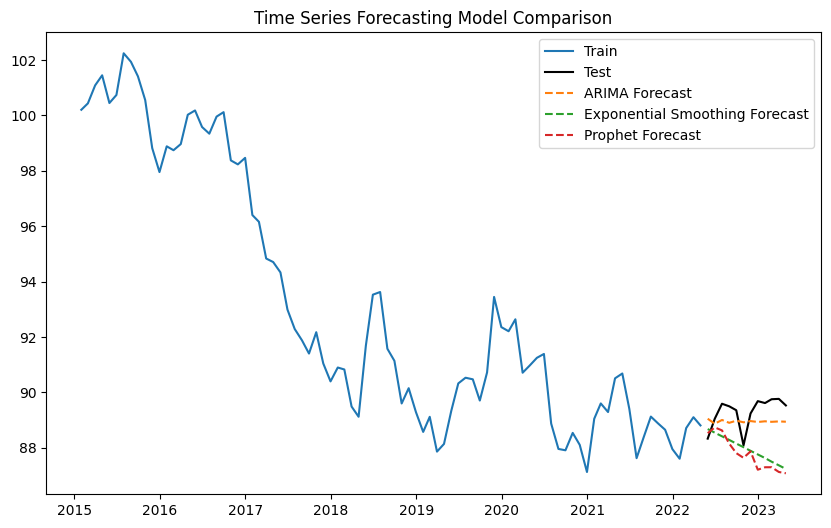

In [ ]:
# Step 6: Plot Forecasts
plt.figure(figsize=(10,6))
plt.plot(train.index, train['Value'], label='Train')
plt.plot(test.index, test['Value'], label='Test', color='black')

plt.plot(test.index, arima_pred, label='ARIMA Forecast', linestyle='--')
plt.plot(test.index, exp_pred, label='Exponential Smoothing Forecast', linestyle='--')
plt.plot(test.index, prophet_pred, label='Prophet Forecast', linestyle='--')

plt.legend()
plt.title('Time Series Forecasting Model Comparison')
plt.show()

In [29]:
# PART 1: REGRESSION MODEL (Crop Yield Prediction)----------------------------------------------------------
# Step 2: Sample Dataset (you can replace this with your CSV)
data = pd.DataFrame({
    'Rainfall': [120, 135, 150, 160, 175, 190, 200, 210, 220, 230],
    'Temperature': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
    'Fertilizer': [50, 55, 60, 65, 70, 75, 80, 85, 90, 95],
    'Crop_Yield': [2.5, 2.8, 3.0, 3.3, 3.5, 3.8, 4.0, 4.3, 4.5, 4.8]
})

# Step 3: Split dataset
X = data[['Rainfall', 'Temperature', 'Fertilizer']]
y = data['Crop_Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("🌾 Crop Yield Regression Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Step 6: Export the trained regression model
joblib.dump(model, "crop_yield_regression_model.pkl")
print("\n✅ Regression model exported successfully as 'crop_yield_regression_model.pkl'")

🌾 Crop Yield Regression Model Evaluation:
MAE: 0.04
RMSE: 0.04

✅ Regression model exported successfully as 'crop_yield_regression_model.pkl'


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.



✅ Prophet Forecast for Crop Yield:
           ds      yhat  yhat_lower  yhat_upper
10 2025-12-31  4.894573    4.874832    4.914897
11 2026-12-31  5.100125    5.073720    5.125240
12 2027-12-31  5.309437    5.273332    5.346970
13 2028-12-31  5.589908    5.535811    5.638168
14 2029-12-31  5.791899    5.723732    5.856556


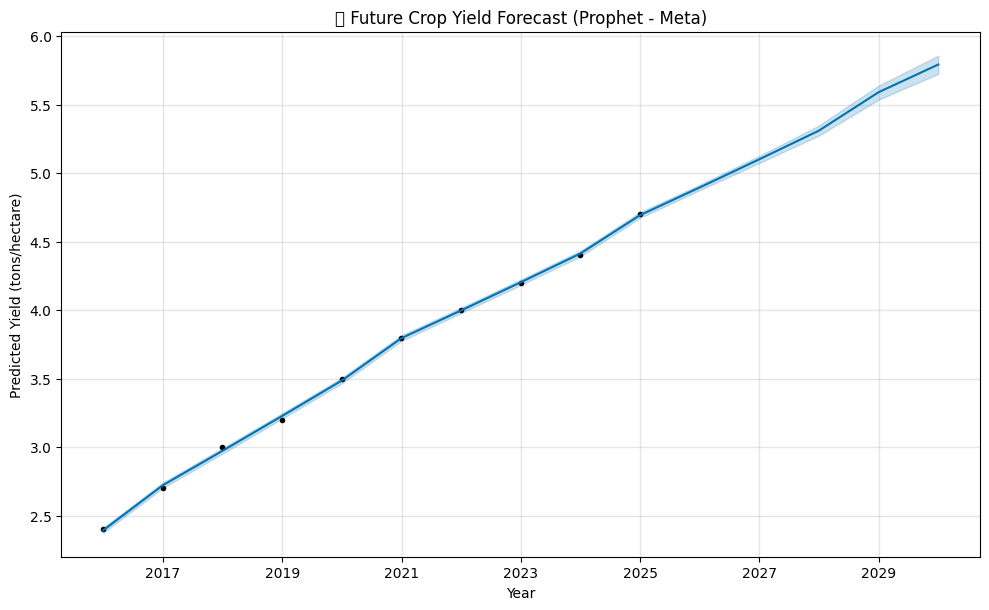

In [ ]:
# PART 2: TIME SERIES FORECASTING USING PROPHET (META)
# ----------------------------------------------------------

# Step 7: Create Time Series Data (e.g., yearly crop yield)
ts_data = pd.DataFrame({
    'Year': pd.date_range(start='2015', periods=10, freq='Y'),
    'Yield': [2.4, 2.7, 3.0, 3.2, 3.5, 3.8, 4.0, 4.2, 4.4, 4.7]
})

# Step 8: Prepare for Prophet
prophet_df = ts_data.rename(columns={'Year': 'ds', 'Yield': 'y'})

# Step 9: Build Prophet Model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Step 10: Forecast next 5 years
future = prophet_model.make_future_dataframe(periods=5, freq='Y')
forecast = prophet_model.predict(future)

# Step 11: Display Forecast
print("\n✅ Prophet Forecast for Crop Yield:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Step 12: Plot Forecast
prophet_model.plot(forecast)
plt.title("📈 Future Crop Yield Forecast (Prophet - Meta)")
plt.xlabel("Year")
plt.ylabel("Predicted Yield (tons/hectare)")
plt.show()

In [ ]:
# SRectify errors and evaluate accuracy
# Sample dataset (replace this with your real crop yield dataset)
data = pd.DataFrame({
    'Rainfall': [120, 135, 150, 160, 175, 190, 200, 210, 220, 230],
    'Temperature': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
    'Fertilizer': [50, 55, 60, 65, 70, 75, 80, 85, 90, 95],
    'Crop_Yield': [2.5, 2.8, 3.0, 3.3, 3.5, 3.8, 4.0, 4.3, 4.5, 4.8]
})

# Split into features and target
X = data[['Rainfall', 'Temperature', 'Fertilizer']]
y = data['Crop_Yield']

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = model.score(X_test, y_test)

print("✅ Crop Yield Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

✅ Crop Yield Regression Model Evaluation:
Mean Absolute Error (MAE): 0.044
Root Mean Squared Error (RMSE): 0.044
R² Score: 0.997


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.



 Regression model exported as 'crop_yield_regression_model.pkl'

🌾 Prophet Forecast for Future Crop Yields:
           ds      yhat  yhat_lower  yhat_upper
10 2025-12-31  5.042130    5.016183    5.068878
11 2026-12-31  5.283906    5.258490    5.311993
12 2027-12-31  5.526778    5.497291    5.556124
13 2028-12-31  5.814927    5.779852    5.846176
14 2029-12-31  6.055615    6.017302    6.092868


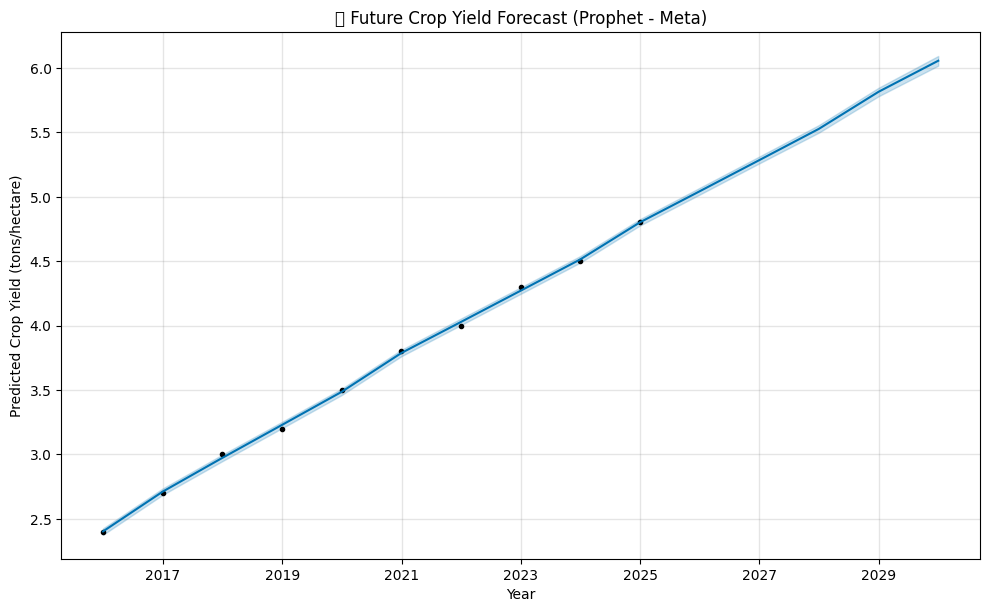

In [ ]:
# Export model & implement Prophet forecasting
# Export the trained regression model
joblib.dump(model, "crop_yield_regression_model.pkl")
print("\n Regression model exported as 'crop_yield_regression_model.pkl'")

# ------------------------------
# Prophet Model for Time Series
# ------------------------------

# Example historical crop yield data
ts_data = pd.DataFrame({
    'Year': pd.date_range(start='2015', periods=10, freq='Y'),
    'Yield': [2.4, 2.7, 3.0, 3.2, 3.5, 3.8, 4.0, 4.3, 4.5, 4.8]
})

# Prepare for Prophet
prophet_df = ts_data.rename(columns={'Year': 'ds', 'Yield': 'y'})

# Create and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Forecast next 5 years
future = prophet_model.make_future_dataframe(periods=5, freq='Y')
forecast = prophet_model.predict(future)

# Display forecast data
print("\n🌾 Prophet Forecast for Future Crop Yields:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot forecast
prophet_model.plot(forecast)
plt.title("🌱 Future Crop Yield Forecast (Prophet - Meta)")
plt.xlabel("Year")
plt.ylabel("Predicted Crop Yield (tons/hectare)")
plt.show()

In [34]:
# PART 4: EXPORT (STORE) ALL MODELS
# ----------------------------------------------------------

joblib.dump(model, "crop_yield_regression_model.pkl")
joblib.dump(prophet_model, "crop_yield_prophet_model.pkl")
joblib.dump(arima_model, "crop_yield_arima_model.pkl")

print("✅ All models exported successfully!")
print("Files saved as:")
print(" - crop_yield_regression_model.pkl")
print(" - crop_yield_prophet_model.pkl")
print(" - crop_yield_arima_model.pkl")

✅ All models exported successfully!
Files saved as:
 - crop_yield_regression_model.pkl
 - crop_yield_prophet_model.pkl
 - crop_yield_arima_model.pkl
